# Impact of COVID-19 on Unemployment in US 
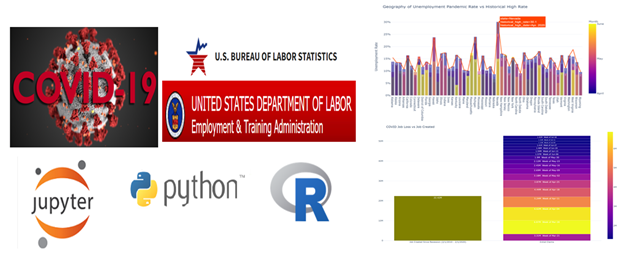

        Data Source : Covid Tracking Project Website 
                      US Bureau of Labor Statistics 
                      US Department of Labor Employment and Training Administration

### KPI:
    1) Unemployment Rate Trend among different category of people
    2) Current Unemployment rate vs Historical High
    3) Change in positive cases over the period for all the states
    4) Top 15 States By COVID cases
    5) Unemployment Insurance claims in relation to increase in COVID cases
    6) COVID Job Loss vs Great Recession



In [1]:
# Import libraries
import requests as res
import lxml.html as lh
import pandas as pd
import json
from bs4 import BeautifulSoup
import csv
import re
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import plot 
import numpy as np
import datetime
import time
from urllib.parse import urljoin
from requests_html import HTMLSession

In [2]:
# API to download Covid data
url = 'https://covidtracking.com/api/v1/states/daily.json'
r = res.get(url)
covidtracking=None
covidtracking=pd.read_json(r.text)
covidtracking.to_csv('covidtacking.csv')

In [3]:
covidtracking['datetime']= pd.to_datetime(covidtracking['date'].astype(str), format='%Y%m%d')
covidtracking['month']=pd.DatetimeIndex(covidtracking['datetime']).month
covidtracking['monthname']=pd.to_datetime(covidtracking['month'], format='%m').dt.month_name().str.slice(stop=3)
covidtracking_df=covidtracking[['datetime','month','monthname','state','positiveIncrease','totalTestResultsIncrease','deathIncrease']].fillna(0)
covidtracking_df.head()

,datetime,month,monthname,state,positiveIncrease,totalTestResultsIncrease,deathIncrease
0,2020-08-14,8,Aug,AK,119,1876,0
1,2020-08-14,8,Aug,AL,752,22422,3
2,2020-08-14,8,Aug,AR,626,5180,5
3,2020-08-14,8,Aug,AS,0,0,0
4,2020-08-14,8,Aug,AZ,927,9397,40


In [4]:
covidtracking_new_df=covidtracking_df.groupby(['state','month','monthname'])[['positiveIncrease','totalTestResultsIncrease','deathIncrease']].sum().reset_index()
covidtracking_new_df.head()

,state,month,monthname,positiveIncrease,totalTestResultsIncrease,deathIncrease
0,AK,3,Mar,119,3705,3
1,AK,4,Apr,236,15406,6
2,AK,5,May,79,32576,1
3,AK,6,Jun,506,60490,4
4,AK,7,Jul,2737,120921,9


In [5]:
#Unemployment Rate by month 
url12='https://www.bls.gov/charts/state-employment-and-unemployment/state-unemployment-rates-animated.htm'
html = res.get(url12).content
df_list = pd.read_html(html)
unemployment_Rate= df_list[-1]
unemployment_Rate=unemployment_Rate.head(51).dropna()

In [6]:
unemployment_Rate.head()

,State,Jun 2010,Jul 2010,Aug 2010,Sep 2010,Oct 2010,Nov 2010,Dec 2010,Jan 2011,Feb 2011,...,Sep 2019,Oct 2019,Nov 2019,Dec 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020
0,Alabama,10.1,10.0,9.9,10.0,10.1,10.2,10.3,10.2,10.2,...,2.7,2.7,2.7,2.7,2.7,2.7,3.0,13.8,9.6,7.5
1,Alaska,7.8,7.8,7.8,7.8,7.8,7.8,7.8,7.8,7.7,...,6.2,6.1,6.1,6.1,6.0,5.8,5.2,13.5,12.7,12.4
2,Arizona,10.3,10.2,10.2,10.1,10.1,10.0,9.9,9.8,9.7,...,4.6,4.5,4.5,4.5,4.5,4.5,6.1,13.4,9.0,10.0
3,Arkansas,8.1,8.1,8.1,8.2,8.3,8.3,8.4,8.5,8.5,...,3.6,3.5,3.5,3.5,3.5,3.5,5.0,10.8,9.6,8.0
4,California,12.2,12.2,12.2,12.2,12.3,12.3,12.2,12.1,12.0,...,3.9,3.9,3.9,3.9,3.9,3.9,5.5,16.4,16.4,14.9


In [7]:
unemployment_Rate_df=unemployment_Rate[['State','Apr 2020','May 2020','Jun 2020']]
unemployment_Rate_df.head()

,State,Apr 2020,May 2020,Jun 2020
0,Alabama,13.8,9.6,7.5
1,Alaska,13.5,12.7,12.4
2,Arizona,13.4,9.0,10.0
3,Arkansas,10.8,9.6,8.0
4,California,16.4,16.4,14.9


In [8]:
unemployment_df=pd.melt(unemployment_Rate_df,id_vars=['State'],value_vars=['Apr 2020','May 2020','Jun 2020'])
unemployment_df['months'] = unemployment_df['variable'].str.extract('([A-Z]\w{0,})', expand=True)
unemployment_df['monthname'] = pd.to_datetime(unemployment_df.months,format='%b').dt.strftime('%B')
unemployment_df['month'] = pd.to_datetime(unemployment_df.months, format='%b').dt.month
unemployment_df=unemployment_df[['State','monthname','month','value']]
unemployment_df.head()

,State,monthname,month,value
0,Alabama,April,4,13.8
1,Alaska,April,4,13.5
2,Arizona,April,4,13.4
3,Arkansas,April,4,10.8
4,California,April,4,16.4


In [9]:
# Unemployment Historical High Rate
url1='https://www.bls.gov/web/laus/lauhsthl.htm#'
html = res.get(url1).content
df_list = pd.read_html(html)
df = df_list[-1]
df=df.head(51).dropna()
unemployment_historical = df.iloc[:,[0,2,3]]
unemployment_historical.columns = unemployment_historical.columns.droplevel(-1)
unemployment_historical.columns=['state','historical_high_date','historical_high_rate']
unemployment_historical.head()

,state,historical_high_date,historical_high_rate
0,Alabama,Dec. 1982,15.5
1,Alaska,Apr. 2020,13.5
2,Arizona,Apr. 2020,13.4
3,Arkansas,Apr. 2020,10.8
4,California,May 2020,16.4


In [10]:
#Unemployment Rate by Category
url4='https://www.bls.gov/charts/employment-situation/civilian-unemployment-rate.htm'
html1 = res.get(url4).content
df_list11 = pd.read_html(html1)
National=df_list11[0].fillna(0)
National.head()

,Month,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino
0,July 2000,4.0,3.3,3.7,13.4,3.5,7.7,0.0,5.8
1,Aug 2000,4.1,3.3,3.8,14.0,3.6,7.9,0.0,5.9
2,Sept 2000,3.9,3.3,3.5,13.0,3.5,7.3,0.0,5.8
3,Oct 2000,3.9,3.3,3.3,12.8,3.4,7.3,0.0,5.1
4,Nov 2000,3.9,3.4,3.4,13.0,3.5,7.3,0.0,6.0


In [11]:
National['Year'] = National['Month'].str.extract('([0-9]\w{0,})', expand=True)
National_df=pd.melt(National,id_vars=['Month','Year'],value_vars=['Total','Men, 20 years and over','Women, 20 years and over',
                                                          '16 to 19 years old','White','Black or African American',
                                                          'Asian','Hispanic or Latino'])
National_df.set_index(["Year"],drop=True,inplace=True)
National_df.head()

,Month,variable,value
Year,,,
2000,July 2000,Total,4.0
2000,Aug 2000,Total,4.1
2000,Sept 2000,Total,3.9
2000,Oct 2000,Total,3.9
2000,Nov 2000,Total,3.9


In [12]:
#Fips data for choropleth map
url3='https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696'
html = res.get(url3).content
df_list1 = pd.read_html(html)
fips=None
fips = df_list1[0].dropna()

fips.head()

,Name,Postal Code,FIPS
0,Alabama,AL,1.0
1,Alaska,AK,2.0
2,Arizona,AZ,4.0
3,Arkansas,AR,5.0
4,California,CA,6.0


In [13]:
# Merge Covid and Fips data 
CovidUnemp=pd.merge(covidtracking_new_df,fips,how='outer',left_on=['state'],right_on=['Postal Code'])
CovidUnemp_df=pd.merge(CovidUnemp,unemployment_df,how='inner',left_on=['Name','month'],right_on=['State','month'])
CovidUnemp_df.head()

,state,month,monthname_x,positiveIncrease,totalTestResultsIncrease,deathIncrease,Name,Postal Code,FIPS,State,monthname_y,value
0,AK,4,Apr,236,15406,6,Alaska,AK,2.0,Alaska,April,13.5
1,AK,5,May,79,32576,1,Alaska,AK,2.0,Alaska,May,12.7
2,AK,6,Jun,506,60490,4,Alaska,AK,2.0,Alaska,June,12.4
3,AL,4,Apr,6038,79917,256,Alabama,AL,1.0,Alabama,April,13.8
4,AL,5,May,10884,130357,362,Alabama,AL,1.0,Alabama,May,9.6


In [14]:
#Employment data
url12='https://www.bls.gov/charts/employment-situation/employment-levels-by-industry.htm'
html11 = res.get(url12).content
df_list12 = pd.read_html(html11)
Payroll=None
Payroll = df_list12[0].dropna()
Payroll_df=pd.DataFrame(Payroll.iloc[:,0 :2].copy())
Payroll_df['Totalnonfarm'] = Payroll_df['Total nonfarm']*1000

#Use shift to get prevous month data
Payroll_df['Totalnonfarm_Shift']=Payroll_df['Totalnonfarm'].shift(1)


In [15]:
Payroll.head()

,Month,Total nonfarm,Total private,Mining and logging,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Utilities,Information,Financial activities,Professional and business services,Education and health services,Leisure and hospitality,Other services,Government,Federal government,State government,Local government
0,July 2000,132236,111369,601,6794,17322,5891.2,15287.5,4402.5,599.4,3658,7766,16741,15244,11900,5162,20867,2942.0,4782.0,13143.0
1,Aug 2000,132230,111393,600,6796,17287,5880.4,15301.1,4420.0,599.5,3583,7777,16772,15281,11927,5169,20837,2868.0,4794.0,13175.0
2,Sept 2000,132353,111618,605,6807,17230,5864.6,15322.5,4408.6,598.4,3674,7799,16834,15353,11940,5182,20735,2745.0,4804.0,13186.0
3,Oct 2000,132351,111608,607,6814,17217,5863.7,15329.7,4420.1,600.1,3677,7809,16847,15360,11876,5187,20743,2736.0,4804.0,13203.0
4,Nov 2000,132556,111796,604,6817,17202,5857.9,15339.2,4435.3,599.4,3685,7823,16886,15410,11946,5191,20760,2737.0,4809.0,13214.0


In [16]:
Payroll_df['monthname'] = Payroll_df['Month'].str.extract('([A-Z]\w{0,})', expand=True)
Payroll_df['monthname'].replace(['June','July','Sept'], ['Jun','Jul','Sep'], inplace=True)
Payroll_df['month'] = pd.to_datetime(Payroll_df.monthname, format='%b').dt.month
Payroll_df['Year'] = Payroll_df['Month'].str.extract('([0-9]\w{0,})', expand=True).astype(int)
Payroll_df['Date']=pd.to_datetime((Payroll_df.Year*10000+Payroll_df.month*100+1).apply(str),format='%Y%m%d')
Payroll_df=Payroll_df[Payroll_df['Date'].between('2010-02-01', '2020-01-01')]

# Calculate MOM change in employmnet to get total new jobs created per month
Payroll_df['TotalEmployment']=Payroll_df['Totalnonfarm'].sub(Payroll_df['Totalnonfarm_Shift'], axis = 0)

#Sum MOM change to get total new jobs creates since 2/2/2010
TotalEmployment=Payroll_df['TotalEmployment'].sum()

TotalEmployment

22422000.0

In [17]:
#Unemployment Insurance Claims
session = HTMLSession()

def get_all_forms(url):
    """Returns all form tags found on a web page's `url` """
    # GET request
    res = session.get(url)
    soup = BeautifulSoup(res.html.html, "html.parser")
    return soup.find_all("form")

def get_form_details(form):
    """Returns the HTML details of a form,
    including action, method and list of form controls (inputs, etc)"""
    details = {}
    # get the form action (requested URL)
    action = form.attrs.get("action").lower()
    # get the form method (POST, GET, DELETE, etc)
    # if not specified, GET is the default in HTML
    method = form.attrs.get("method", "get").lower()
    # get all form inputs
    inputs = []
    for input_tag in form.find_all("input"):
        # get type of input form control
        input_type = input_tag.attrs.get("type", "text")
        # get name attribute
        input_name = input_tag.attrs.get("name")
        # get the default value of that input tag
        input_value =input_tag.attrs.get("value", "")
        # add everything to that list
        inputs.append({"type": input_type, "name": input_name, "value": input_value})
    # put everything to the resulting dictionary
    details["action"] = action
    details["method"] = method
    details["inputs"] = inputs
    return details

url = "https://oui.doleta.gov/unemploy/claims.asp"
# get all form tags
forms = get_all_forms(url)
# iteratte over forms
for i, form in enumerate(forms, start=1):
    form_details = get_form_details(form)
    #print("="*50, f"form #{i}", "="*50)
    #print(form_details)

In [18]:
data={'level': 'us', 'strtdate': '2000', 'enddate': '2020', 'filetype': 'html'}

url = urljoin(url, form_details["action"])

if form_details["method"] == "post":
    res = session.post(url, data=data)
elif form_details["method"] == "get":
    res = session.get(url, params=data)
session.close()

In [19]:
outfile = open("Unemployment Insurance Claims.csv","w",newline='')
writer = csv.writer(outfile)
writer.writerow(('Date', 'nsa_initial_claims', 'sf_initial_claims', 'sa_initial_claims', 'sa_4_week_initial_claims',
                'nsa_continued_claims', 'sf_continued_claims', 'sa_continued_claims', 'sa_4_week_continued_claims',
                'nsa_iur', 'sa_iur', 'cov_employment'))

tree = BeautifulSoup(res.content,"lxml")
table_tag = tree.select("table")[0]
tab_data = [[item.text for item in row_data.select("th,td")]
                for row_data in table_tag.select("tr")]



for i,data in enumerate(tab_data):
    if i<=2:
        continue
    else:
        writer.writerow(data)
        #print(' '.join(data))
        
outfile.close()

In [20]:
National_UIC=pd.read_csv("Unemployment Insurance Claims.csv",engine='python',thousands=',')
National_UIC.head()

,Date,nsa_initial_claims,sf_initial_claims,sa_initial_claims,sa_4_week_initial_claims,nsa_continued_claims,sf_continued_claims,sa_continued_claims,sa_4_week_continued_claims,nsa_iur,sa_iur,cov_employment
0,01/01/2000,439912,153.7,286000,278250,2761926,131.4,2102000,2099250,2.2,1.7,123830071
1,01/08/2000,606897,203.6,298000,284750,2686013,127.5,2107000,2108500,2.2,1.7,123830071
2,01/15/2000,442494,152.9,289000,285250,2588921,122.4,2115000,2106500,2.1,1.7,123830071
3,01/22/2000,328841,115.6,284000,289250,2547393,123.6,2061000,2096250,2.1,1.7,123830071
4,01/29/2000,332740,116.6,285000,289000,2676851,123.7,2164000,2111750,2.2,1.7,123830071


In [21]:

National_UIC=National_UIC[['Date','sa_initial_claims']]
National_UIC=National_UIC[National_UIC['sa_initial_claims'].str.len() > 1]
National_UIC.rename(columns={'sa_initial_claims' : 'InitialClaims'},inplace=True)

#National_UIC['Year-Week'] = National_UIC['Date'].dt.strftime('%Y-%U')
National_UIC['Date'] =  pd.to_datetime(National_UIC['Date'],errors='coerce')
National_UIC['InitialClaims'] = National_UIC['InitialClaims'].astype(int)
National_UIC['Year'] = National_UIC['Date'].dt.year
National_UIC['Year-Week']=National_UIC['Date'].dt.strftime('%b-%d')
National_UIC_df=pd.DataFrame(National_UIC[National_UIC['Date']>pd.Timestamp(2020,3,20)])
National_UIC_df['text'] = (National_UIC_df['InitialClaims']/1000000).round(2).astype(str)+'M  Week of '+ National_UIC['Date'].dt.strftime('%b-%d')
National_UIC_df['axislabel'] = 'Initial Claims'
National_UIC_df.head()

,Date,InitialClaims,Year,Year-Week,text,axislabel
1055,2020-03-21,3307000,2020,Mar-21,3.31M Week of Mar-21,Initial Claims
1056,2020-03-28,6867000,2020,Mar-28,6.87M Week of Mar-28,Initial Claims
1057,2020-04-04,6615000,2020,Apr-04,6.62M Week of Apr-04,Initial Claims
1058,2020-04-11,5237000,2020,Apr-11,5.24M Week of Apr-11,Initial Claims
1059,2020-04-18,4442000,2020,Apr-18,4.44M Week of Apr-18,Initial Claims


In [22]:
# Unemployment Rate by Category
fig=px.line(National_df,x='Month',y='value',color='variable',title='U.S. Unemployment Rate',
           width=1000,height=750,
            labels={ "value": "Unemployment Rate",'variable':''},
            template="simple_white"
           )
fig.update_yaxes(ticksuffix="%",automargin=True)

fig.update_xaxes(rangeslider_visible=True)

plot(fig)

'temp-plot.html'

In [23]:
#Current Unemployment rate vs Historical High

unemployment_df=unemployment_df.sort_values(by=['State'],ascending=True)
fig=px.bar(unemployment_df,x='State',y='value',color='month',barmode='overlay',
            color_discrete_sequence=px.colors.sequential.Inferno,text='value',height=800,
          title='Geography of Unemployment Pandemic Rate vs Historical High Rate',
        opacity=.6,template='plotly_white')

fig2=px.line(unemployment_historical,x='state', y='historical_high_rate',
             hover_data=['historical_high_date', 'historical_high_rate'],color_discrete_sequence=['orangered'])
fig.add_trace(fig2.data[0])
fig.update_layout(coloraxis_colorbar=dict(title='Month',tickmode ='array',
                                          tickvals=unemployment_df['month'],
                                          ticktext=unemployment_df['monthname']))
fig.update_yaxes(title='Unemployment Rate',ticksuffix="%",automargin=True)
fig.update_xaxes(rangeslider_visible=True)

plot(fig)

'temp-plot.html'

In [24]:
#Change in positive cases over the period for all the states

from urllib.request import urlopen
with urlopen('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json') as response:
    states = json.load(response)

fig = px.choropleth_mapbox(CovidUnemp,geojson=states,
                           locations='state',
                           color='positiveIncrease',
                           color_continuous_scale="Viridis",animation_frame='month',animation_group='state',
                           category_orders={'month':[1,2,3,4,5,6,7,8,9,10,11,12]},
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'positiveIncrease':'Total cases'},
                           title='Spread Of COVID-19 In US'
                          )
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0},geo_scope='usa')


plot(fig)


'temp-plot.html'

In [25]:
time.sleep(5)

In [26]:
import rpy2.ipython

C:\Users\sukan\anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning:

pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.



In [27]:
%load_ext rpy2.ipython
#%reload_ext rpy2.ipython 


In [28]:
# %%R 
# install.packages('ggplot2', repos= 'http://cran.us.r-project.org', quiet=TRUE)
# install.packages('gganimate', repos= 'http://cran.us.r-project.org', quiet=TRUE)
# install.packages('dplyr', repos= 'http://cran.us.r-project.org', quiet=TRUE)
# install.packages('png', repos= 'http://cran.us.r-project.org', quiet=TRUE)
# install.packages('gifski', repos= 'http://cran.us.r-project.org', quiet=TRUE)
# install.packages('transformr', repor='https://githhub.com/thomasp85/transformr')
# install.packages('reticulate', repor='https://githhub.com/thomasp85/transformr')


In [29]:
#Unemployment Insurance claims in relation to increase in COVID cases

In [30]:
%%R -w 3 -h 3 --units in -r 200
library(ggplot2)
library(gganimate)
library(dplyr)
library(png)
library(gifski)
library(reticulate)

r_df <- read.csv(file = 'Claims_R_data.csv',header = TRUE,stringsAsFactors = FALSE) 
r_df[['Date']] <- as.Date(r_df[['Date']], format='%Y-%m-%d')

a <- ggplot(r_df,aes(x=Date,y=value/1000))+geom_line()+geom_point(color="red")+transition_reveal(Year)+view_follow()+theme_minimal()+theme(plot.caption=element_text(hjust=0))+labs(x="",y="",title="Initial Jobless Claims (thousands)",caption="Source U.S. Department of Labor")+enter_fade()+exit_fade()+labs(x="",y="",title="Initial Jobless Claims (thousands, seasonally adjusted)")

animate(a,end_pause=25, nframes=250)

In [31]:
#COVID Job Loss vs Great Recession

TotalEmployment_text=(TotalEmployment/1000000).round(2).astype(str)+'M'
data = dict({TotalEmployment_text:TotalEmployment})
df=pd.DataFrame(list(data.items()),columns =['TotalEmployment_text','TotalEmployment'])
df['Job Created Since Recession (2/1/2010 - 2/1/2020)']="Job Created Since Recession (2/1/2010 - 2/1/2020)"

fig=px.bar(df,x='Job Created Since Recession (2/1/2010 - 2/1/2020)',
           y='TotalEmployment',
           text='TotalEmployment_text',
           template='plotly_white',
           color_discrete_sequence=['olive'],
           title='COVID Job Loss vs Job Created',
           labels={'Job Created Since Recession (2/1/2010 - 2/1/2020)':'','TotalEmployment':''}
           )

fig2=px.bar(National_UIC_df,x='axislabel', y='InitialClaims',barmode='relative',
            color_discrete_sequence=px.colors.sequential.Inferno,
            color='InitialClaims',
            text='text', height=1600
           )
fig.add_trace(fig2.data[0])
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.update_traces(textposition="inside")
fig.update_layout(uniformtext_minsize=10
                  )
plot(fig)

'temp-plot.html'